In [13]:
import streamlit as st
from stqdm import stqdm

In [14]:
from speaker_embedding import preprocess_wav, VoiceEncoder
from demo_utils import *
from itertools import groupby
from pathlib import Path
from tqdm import tqdm
import numpy as np
import pandas as pd
import pickle
import argparse, sys, os, json, codecs

In [15]:
import warnings
warnings.filterwarnings('ignore')

In [16]:
import matplotlib.pyplot as plt
import matplotlib
cmaps = plt.colormaps()
plt.rcParams["font.family"] = 'AppleGothic'
matplotlib.rcParams['axes.unicode_minus'] = False

from umap import UMAP
import plotly.express as px

In [17]:
import torch
from torch import nn
from skorch import NeuralNetClassifier

## Making Segment Vectors

In [18]:
def get_embeddings(path_sample):
    wav_fpaths = list(Path(path_sample).glob("*.wav"))
    voice_type = list(map(lambda wav_fpath: wav_fpath.parent.stem, wav_fpaths))
    wavs = np.array(list(map(preprocess_wav, stqdm(
        wav_fpaths, "Preprocessing wavs", len(wav_fpaths), position=0))))
    st.success('Finished preprocessing')

    encoder = VoiceEncoder()
    utterance_embeds = np.array(
        list(map(encoder.embed_utterance, stqdm(wavs, "compute emb vec.", len(wavs)))))
    st.success('Finished embedding compute')

    voice_type_wavs = {speaker: wavs[list(indices)] for speaker, indices in
                        stqdm(groupby(range(len(wavs)), lambda i: voice_type[i]))}
    voice_type_embeds = np.array([encoder.embed_speaker(wavs[:len(wavs)])
                                    for wavs in stqdm(voice_type_wavs.values())])
    st.success('Finished voice-type embeddings')

    return voice_type, wavs, utterance_embeds, voice_type_wavs, voice_type_embeds

- wavs

In [ ]:
'''
path_sample = '/media/kwangje/Samsung_T5/210218_아이안심검색_학습데이터/training/clean+real_child_123_v2_1'

wav_fpaths = list(Path(path_sample).glob("*.wav"))
voice_type = list(map(lambda wav_fpath: wav_fpath.parent.stem, wav_fpaths))
wavs_child123_v2_1 = np.array(list(map(preprocess_wav, stqdm(wav_fpaths, "Preprocessing wavs", len(wav_fpaths), position=0))))

with open('./embeds/wavs/wavs_child123_v2_1.pkl', 'wb') as f:
    pickle.dump(wavs_child123_v2_1, f)


path_sample = '/media/kwangje/Samsung_T5/210218_아이안심검색_학습데이터/training/clean+real_adult_male_v2_1'

wav_fpaths = list(Path(path_sample).glob("*.wav"))
voice_type = list(map(lambda wav_fpath: wav_fpath.parent.stem, wav_fpaths))
wavs_adult_male_v2_1 = np.array(list(map(preprocess_wav, stqdm(wav_fpaths, "Preprocessing wavs", len(wav_fpaths), position=0))))

with open('./embeds/wavs/wavs_adult_male_v2_1.pkl', 'wb') as f:
    pickle.dump(wavs_adult_male_v2_1, f)


path_sample = '/media/kwangje/Samsung_T5/210218_아이안심검색_학습데이터/training/clean+real_adult_female_v2_1'

wav_fpaths = list(Path(path_sample).glob("*.wav"))
voice_type = list(map(lambda wav_fpath: wav_fpath.parent.stem, wav_fpaths))
wavs_adult_female_v2_1 = np.array(list(map(preprocess_wav, stqdm(wav_fpaths, "Preprocessing wavs", len(wav_fpaths), position=0))))

with open('./embeds/wavs/wavs_adult_female_v2_1.pkl', 'wb') as f:
    pickle.dump(wavs_adult_female_v2_1, f)
'''

In [ ]:
'''
path_child123_v2_1 = '/media/kwangje/Samsung_T5/210218_아이안심검색_학습데이터/training/clean+real_child_123_v2_1'

voice_type_child123_v2_1, wavs_child123_v2_1, utterance_embeds_child123_v2_1, voice_type_wavs_child123_v2_1, voice_type_embeds_child123_v2_1 = get_embeddings(path_child123_v2_1)

with open('voice_type_embeds_child123_v2_1.pkl', 'wb') as f:
    pickle.dump(voice_type_embeds_child123_v2_1, f)


path_female_v2_1 = '/media/kwangje/Samsung_T5/210218_아이안심검색_학습데이터/training/clean+real_adult_female_v2_1'

voice_type_adult_female_v2_1, wavs_adult_female_v2_1, utterance_embeds_adult_female_v2_1, voice_type_wavs_adult_female_v2_1, voice_type_embeds_adult_female_v2_1 = get_embeddings(path_female_v2_1)

with open('voice_type_embeds_adult_female_v2_1.pkl', 'wb') as f:
    pickle.dump(voice_type_embeds_adult_female_v2_1, f)


path_male_v2_1 = '/media/kwangje/Samsung_T5/210218_아이안심검색_학습데이터/training/clean+real_adult_male_v2_1'

voice_type_adult_male_v2_1, wavs_adult_male_v2_1, utterance_embeds_adult_male_v2_1, voice_type_wavs_adult_male_v2_1, voice_type_embeds_adult_male_v2_1 = get_embeddings(path_male_v2_1)

with open('voice_type_embeds_adult_male_v2_1.pkl', 'wb') as f:
    pickle.dump(voice_type_embeds_adult_male_v2_1, f)
'''

In [ ]:
'''
utterance_embeds_child123 = np.array(list(map(encoder.embed_utterance, tqdm(wavs_child_123_real))))
utterance_embeds_female = np.array(list(map(encoder.embed_utterance, tqdm(wavs_adult_female_real))))
utterance_embeds_male = np.array(list(map(encoder.embed_utterance, tqdm(wavs_adult_male_real))))

with open('utterance_embeds_child123.pkl', 'wb') as f:
    pickle.dump(utterance_embeds_child123, f)

with open('utterance_embeds_female.pkl', 'wb') as f:
    pickle.dump(utterance_embeds_female, f)

with open('utterance_embeds_male.pkl', 'wb') as f:
    pickle.dump(utterance_embeds_male, f)
'''

In [19]:
embeds_path = "/home/kwangje/Desktop/sr-iptv-proto/embeds"

In [20]:
with open(embeds_path+'/wavs/wavs_child123_v2_1.pkl','rb') as f:
    wavs_child_123_real = pickle.load(f)

with open(embeds_path+'/wavs/wavs_adult_female_v2_1.pkl','rb') as f:
    wavs_adult_female_real = pickle.load(f)

with open(embeds_path+'/wavs/wavs_adult_male_v2_1.pkl','rb') as f:
    wavs_adult_male_real = pickle.load(f)

In [22]:
with open(embeds_path+'/real/voice_type_embeds_child123_v2_1.pkl','rb') as f:
    embeds_child_123_real = pickle.load(f)

with open(embeds_path+'/real/voice_type_embeds_adult_male_v2_1.pkl','rb') as f:
    embeds_adult_female_real = pickle.load(f)

with open(embeds_path+'/real/voice_type_embeds_adult_female_v2_1.pkl','rb') as f:
    embeds_adult_male_real = pickle.load(f)

In [23]:
from speaker_embedding import preprocess_wav, VoiceEncoder

encoder = VoiceEncoder()
encoder.load_state_dict

Loaded the voice encoder model on cpu in 0.01 seconds.


<bound method Module.load_state_dict of VoiceEncoder(
  (lstm): LSTM(40, 256, num_layers=3, batch_first=True)
  (linear): Linear(in_features=256, out_features=256, bias=True)
  (relu): ReLU()
)>

In [24]:
with open(embeds_path+'/utter/utterance_embeds_child123.pkl','rb') as f:
    utterance_embeds_child123 = pickle.load(f)

with open(embeds_path+'/utter/utterance_embeds_female.pkl','rb') as f:
    utterance_embeds_female = pickle.load(f)

with open(embeds_path+'/utter/utterance_embeds_male.pkl','rb') as f:
    utterance_embeds_male = pickle.load(f)

### visualization for age groups

In [25]:
import plotly.graph_objects as go
import plotly.express as px

In [26]:
def hist(speaker_wavs, spk_embeds_total, test_embed):
    spk_sim_matrix = np.inner(spk_embeds_total, test_embed)

    labels = [i for i in speaker_wavs.keys()]
    stats = dict(zip(labels, spk_sim_matrix))

    fig = go.Figure([go.Bar(x=labels, y=spk_sim_matrix)])

    result = max(stats, key=stats.get)

    fig.update_layout(margin=dict(l=5, r=5, b=5, t=5))
    st.plotly_chart(fig)
    return stats, result

In [ ]:
'''
speaker_wavs = {speaker: wavs[list(indices)] for speaker, indices in 
                groupby(range(len(wavs)), lambda i: speakers[i])}

utterance_embeds = np.array(list(map(encoder.embed_utterance, wavs)))

wav_fpaths = list(Path("audio_data", "iptv_uttr", "sample1_wt_label").glob("**/*.wav"))
speakers = list(map(lambda wav_fpath: wav_fpath.parent.stem, wav_fpaths))
wavs = np.array(list(map(preprocess_wav,tqdm(wav_fpaths, "Preprocessing wavs", len(wav_fpaths), position=0))))
speaker_wavs = {speaker: wavs[list(indices)] for speaker, indices in 
                groupby(range(len(wavs)), lambda i: speakers[i])}
'''

In [27]:
from umap import UMAP
import plotly.express as px
import plotly.graph_objs as go
from plotly.offline import plot

In [21]:
'''
utterance_embeds_female     61362
utterance_embeds_male       59214
utterance_embeds_child123   50849
total                       171425
'''

utterance_embeds_total = np.append(utterance_embeds_female, utterance_embeds_male, axis=0)
utterance_embeds_total = np.append(utterance_embeds_total, utterance_embeds_child123, axis=0)

In [56]:
reducer = UMAP(n_neighbors=30, min_dist=0.2, n_components=3)
proj_3d = reducer.fit_transform(utterance_embeds_total)

In [57]:
df = pd.DataFrame(proj_3d)

In [58]:
df.loc[:61361, "voice_type"] = 'female'
df.loc[61362:120576, "voice_type"] = "male"
df.loc[120576:, "voice_type"] = "child"
#df.loc[:61361, :]

In [60]:
df["voice_type"].value_counts()


female    61362
male      59214
child     50849
Name: voice_type, dtype: int64

In [63]:
fig_3d = px.scatter_3d(
    proj_3d, x=0, y=1, z=2,
    color=df.voice_type, labels={'color': 'voice_type'}, opacity=0.7)
    
fig_3d.update_traces(marker_size=1)
fig_3d.update_layout(margin=dict(l=0, r=0, b=0, t=0))
fig_3d.write_html("clf_dvector.html")


In [ ]:
wav_fpaths = list(Path("audio_data", "iptv_uttr", "sample1_wt_label").glob("**/*.wav"))
speakers = list(map(lambda wav_fpath: wav_fpath.parent.stem, wav_fpaths))
wavs = np.array(list(map(preprocess_wav, tqdm(wav_fpaths, "Preprocessing wavs", len(wav_fpaths), position=0))))
speaker_wavs = {speaker: wavs[list(indices)] for speaker, indices in 
                groupby(range(len(wavs)), lambda i: speakers[i])}

In [8]:
spk_embeds_total = np.array([encoder.embed_speaker(wavs[:len(wavs)]) \
                         for wavs in speaker_wavs.values()]) 

In [12]:
audio_file = open('./audio_data/iptv_uttr/test/김나영1.wav', 'rb')
audio_bytes = audio_file.read()
st.audio(audio_bytes, format='audio/wav')

test_path = Path("audio_data", "iptv_uttr", "test", "김나영1.wav") 
test_wav = preprocess_wav(test_path)
test_embed = encoder.embed_utterance(test_wav)



In [13]:
spk_sim_matrix = np.inner(spk_embeds_total, test_embed)
spk_sim_matrix

array([0.6199627 , 0.65453327, 0.658043  , 0.62898433, 0.6088758 ,
       0.6215208 , 0.6228334 , 0.6298673 , 0.88850504, 0.7717104 ],
      dtype=float32)

In [16]:
labels = [i for i in speaker_wavs.keys()]
stats = dict(zip(labels, spk_sim_matrix))
max(stats, key=stats.get)

'김나영'

In [46]:
import plotly.graph_objects as go

fig = go.Figure([go.Bar(x=labels, y=spk_sim_matrix)])
fig.show()

In [52]:
test_path = Path("audio_data", "iptv_uttr", "test", "이윤규2_unk.wav") 
test_wav = preprocess_wav(test_path)
test_embed = encoder.embed_utterance(test_wav)

spk_sim_matrix = np.inner(spk_embeds_total, test_embed)

labels = [i for i in speaker_wavs.keys()]
stats = dict(zip(labels, spk_sim_matrix))
# max(stats, key=stats.get)

fig = go.Figure([go.Bar(x=labels, y=spk_sim_matrix)])
fig.show()




In [ ]:
embeds_total = np.array([encoder.embed_utterance(wav[:len(wavs)]) \
                    for wav in wavs])

In [54]:

# Take 6 real embeddings at random, and leave the 6 others for testing
gt_indices = np.random.choice(*np.where(speakers == "real"), 6, replace=False) 
mask = np.zeros(len(embeds), dtype=np.bool)
mask[gt_indices] = True
gt_embeds = embeds[mask]
gt_names = names[mask]
gt_speakers = speakers[mask]
embeds, speakers, names = embeds[~mask], speakers[~mask], names[~mask]


## Compare all embeddings against the ground truth embeddings, and compute the average similarities.
scores = (gt_embeds @ embeds.T).mean(axis=0)

# Order the scores by decreasing order
sort = np.argsort(scores)[::-1]
scores, names, speakers = scores[sort], names[sort], speakers[sort]


## Plot the scores
fig, _ = plt.subplots(figsize=(6, 6))
indices = np.arange(len(scores))
plt.axhline(0.84, ls="dashed", label="Prediction threshold", c="black")
plt.bar(indices[speakers == "real"], scores[speakers == "real"], color="green", label="Real")
plt.bar(indices[speakers == "fake"], scores[speakers == "fake"], color="red", label="Fake")
plt.legend()
plt.xticks(indices, names, rotation="vertical", fontsize=8)
plt.xlabel("Youtube video IDs")
plt.ylim(0.7, 1)
plt.ylabel("Similarity to ground truth")
fig.subplots_adjust(bottom=0.25)
plt.show()

(256,)

In [67]:
df.head()

,0,1,2,speaker,성별,연령대
0,9.827723,6.265584,15.876634,박민선,남/여,어린이 O/X
1,10.144375,6.214613,14.719415,박민선,남/여,어린이 O/X
2,10.060729,6.560548,15.004018,박민선,남/여,어린이 O/X
3,9.971467,6.110773,14.538797,박민선,남/여,어린이 O/X
4,9.972331,6.334342,14.581286,박민선,남/여,어린이 O/X


In [68]:
df.shape[0]

1590

In [80]:
encoder = VoiceEncoder()
utterance_embeds = np.array(list(map(encoder.embed_utterance, wavs)))
encoder


Loaded the voice encoder model on cuda in 0.02 seconds.


VoiceEncoder(
  (lstm): LSTM(40, 256, num_layers=3, batch_first=True)
  (linear): Linear(in_features=256, out_features=256, bias=True)
  (relu): ReLU()
)

### speaker embedding: similarity computation

In [11]:
speaker_wavs.get('김윤재')[:3]

array([array([ 0.00051591,  0.00046901,  0.0001407 , ..., -0.0001876 ,
        0.00023451,  0.00042211], dtype=float32),
       array([-0.00054932,  0.00015259, -0.00021362, ...,  0.00064087,
        0.00073242,  0.00033569], dtype=float32),
       array([ 0.0000000e+00,  0.0000000e+00, -3.0885127e-05, ...,
       -1.1118646e-03, -8.3389843e-04, -1.1118646e-03], dtype=float32)],
      dtype=object)

In [13]:
# wavs[0] : 인간극장 정동원편 틀어주세요
embeds_a = np.array([encoder.embed_utterance(wavs[0]) for wavs in speaker_wavs.values()])

# wavs[1] : 우아한 모녀 실행해줘 
embeds_b = np.array([encoder.embed_utterance(wavs[1]) for wavs in speaker_wavs.values()])

print("Shape of embeddings: %s" % str(embeds_a.shape))

Shape of embeddings: (10, 256)


In [14]:
# similarity matrix: cosine distance, L2
utt_sim_matrix = np.inner(embeds_a, embeds_b)
utt_sim_matrix2 = np.zeros((len(embeds_a), len(embeds_b))) # long, detailed version

for i in range(len(embeds_a)):
    for j in range(len(embeds_b)):
        utt_sim_matrix2[i, j] = embeds_a[i] @ embeds_b[j]  # np.matmul(embeds_a[i], embeds_b[i])  

assert np.allclose(utt_sim_matrix, utt_sim_matrix2) 

- Similarity between two speaker embeddings
    * Divide the utterances of each speaker in groups of identical size
    * embed each group as a speaker embedding

In [15]:
spk_embeds_a = np.array([encoder.embed_speaker(wavs[:len(wavs) // 2]) \
                         for wavs in speaker_wavs.values()])
spk_embeds_b = np.array([encoder.embed_speaker(wavs[len(wavs) // 2:]) \
                         for wavs in speaker_wavs.values()])

In [16]:
spk_sim_matrix = np.inner(spk_embeds_a, spk_embeds_b)
labels_a = ["%s-A" % i for i in speaker_wavs.keys()]
labels_b = ["%s-B" % i for i in speaker_wavs.keys()]
mask = np.eye(len(utt_sim_matrix), dtype=np.bool)

In [17]:
labels_a = ["%s-A" % i for i in speaker_wavs.keys()]
labels_b = ["%s-B" % i for i in speaker_wavs.keys()]
mask = np.eye(len(utt_sim_matrix2), dtype=np.bool)

<AxesSubplot:title={'center':'Cross-similarity between utterances\n(speaker_id-utterance_group)'}>

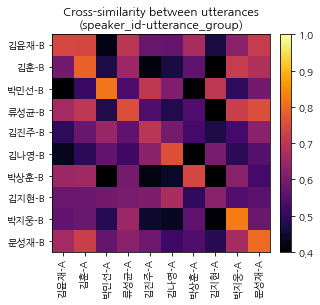

In [18]:
plot_similarity_matrix(utt_sim_matrix2, labels_a, labels_b, 
                       title="Cross-similarity between utterances\n(speaker_id-utterance_group)")

<AxesSubplot:title={'center':'Normalized histogram of similarity\nvalues between utterances'}>

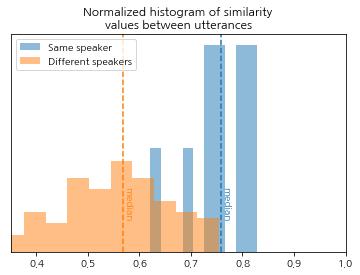

In [19]:
plot_histograms((utt_sim_matrix2[mask], utt_sim_matrix2[np.logical_not(mask)]), 
                names=["Same speaker", "Different speakers"], 
                title="Normalized histogram of similarity\nvalues between utterances")

In [22]:
test_path = Path("audio_data", "iptv_uttr", "test", "record_163357.pcm.wav") 
test_wav = preprocess_wav(test_path)
test_embed = encoder.embed_utterance(test_wav) 

In [26]:
spk_embeds_total = np.array([encoder.embed_speaker(wavs[:len(wavs)]) \
                         for wavs in speaker_wavs.values()]) 

In [30]:
spk_sim_matrix = np.inner(spk_embeds_total, test_embed)
spk_sim_matrix

array([0.6364689 , 0.6043494 , 0.6463269 , 0.5718777 , 0.688427  ,
       0.8805681 , 0.65756977, 0.7757151 , 0.56808317, 0.62214327],
      dtype=float32)

In [31]:
labels = [i for i in speaker_wavs.keys()]

In [56]:
stats = dict(zip(labels, spk_sim_matrix))
result = max(stats, key=stats.get)

In [60]:
stats[result]

0.80910456

In [57]:
max(stats, key=stats.get)

'박지웅'

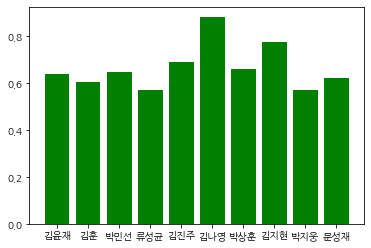

In [33]:
plt.bar(list(stats.keys()), stats.values(), color='g')
plt.show()

In [ ]:
### 
wav_fpaths = list(Path("audio_data", "iptv_uttr", "sample").glob("**/*.wav"))
speakers = list(map(lambda wav_fpath: wav_fpath.parent.stem, wav_fpaths))
wavs = np.array(list(map(preprocess_wav, tqdm(wav_fpaths, "Preprocessing wavs", len(wav_fpaths), position=0))))
speaker_wavs = {speaker: wavs[list(indices)] for speaker, indices in 
                groupby(range(len(wavs)), lambda i: speakers[i])}

In [ ]:
data_dir = Path("audio_data", "librispeech_train-clean-100")
wav_fpaths = list(data_dir.glob("*.flac"))
speakers = [fpath.stem.split("-")[0] for fpath in wav_fpaths]
wavs = [preprocess_wav(wav_fpath) for wav_fpath in \
        tqdm(wav_fpaths, "Preprocessing wavs", len(wav_fpaths), unit=" utterances")]

In [ ]:
def plot_projection_adv(embeds, speakers, ax=None, colors=None, markers=None, legend=True, 
                        title="", **kwargs):
    if ax is None:
        _, ax = plt.subplots(figsize=(10, 10))
        
    reducer = UMAP(n_neighbors=30, min_dist=0.2, n_components=3) # **kwargs
    projs = reducer.fit_transform(embeds)  # projs.shape
    speakers = np.array(speakers)
    
    for i, speaker in enumerate(np.unique(speakers)):
        speaker_projs = projs[speakers == speaker]
        marker = "o" if markers is None else markers[i]
        label = speaker if legend else None
        ax.scatter(*speaker_projs.T, cmap='gray', 
                    marker=marker, label=label, alpha=0.7)  # cmap=plt.cm.Blues, 

    if legend:
        ax.legend(title="Speakers", ncol=2, loc="upper right")
    ax.set_title(title)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_aspect("auto")
    
    return projs

In [5]:
from voice_type_service import Voice_Type_Detect_Service 

Loaded the voice encoder model on cpu in 0.01 seconds.


In [6]:
FILE_PATH = "0a0bb0b2-628a-479f-8c97-b6fc38fc65fb.wav"

In [7]:
# invoke voice-type detection service and get prediction
service = Voice_Type_Detect_Service()

In [8]:
service.age_clf_single(FILE_PATH)

'adult_male'

In [9]:
service = Voice_Type_Detect_Service()
predicted_type = service.age_clf_single(FILE_PATH)
print(predicted_type)

adult_male


In [10]:
FILE_PATH = "audio_data/sample/test/"
audio_file = "0a0bb0b2-628a-479f-8c97-b6fc38fc65fb.wav"

file = open(FILE_PATH + audio_file, "rb")
file

<_io.BufferedReader name='audio_data/sample/test/0a0bb0b2-628a-479f-8c97-b6fc38fc65fb.wav'>

In [11]:
import requests

In [12]:
values = {"file": (FILE_PATH, file, "audio/wav")}

In [13]:
values

{'file': ('audio_data/sample/test/',
  <_io.BufferedReader name='audio_data/sample/test/0a0bb0b2-628a-479f-8c97-b6fc38fc65fb.wav'>,
  'audio/wav')}